In [1]:
#Becky Jacob
#CSC478 Homework 3

In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import os
from sklearn import feature_selection
from sklearn import cross_validation
import math

In [3]:
#Question 1

In [4]:
#####################
#Part a
#####################
'''Load and preprocess data. No need to normalize. 
Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each variables. 
Separate the target attribute for regression.'''

'Load and preprocess data. No need to normalize. \nCompute and display basic statistics (mean, standard deviation, min, max, etc.) for each variables. \nSeparate the target attribute for regression.'

In [5]:
comm_ = pd.read_csv('communities.csv', sep=',', na_values=['?'])
comm_.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [6]:
del comm_['communityname']
del comm_['state']

In [7]:
#check for NaNs
#comm_.isnull().values.any()
comm_.isnull().sum().sum()

1

In [8]:
comm_[comm_.OtherPerCap.isnull()]

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
130,0.02,0.38,0.98,0.22,0.01,0.01,0.44,0.4,0.27,0.58,...,0.0,0.01,0.84,0.7,0.83,0.77,0.04,0.12,0.05,0.23


In [9]:
comm_.dropna(axis=0, inplace=True)
comm_.shape

(1993, 98)

In [10]:
comm_.isnull().sum().sum()

0

In [11]:
comm_.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [12]:
#The site describing the data lists a "County" feature which does not exist.
#The actual data does include a 'Community Name' feature that is not listed on the site. 

In [13]:
comm_.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,0.423086,...,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.237983
std,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,0.179196,...,0.100424,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.233043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.000000,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#Remove target variable
comm_records = comm_.iloc[:,0:97]
comm_target = comm_.iloc[:,97]
comm_records.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [15]:
comm_target.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [16]:
comm_target.shape

(1993,)

In [17]:
comm_records = comm_records.as_matrix()
comm_target = comm_target.as_matrix()

In [18]:
#####################
#Part b
#####################
'''b. Perform standard linear regression. Compute the RMSE value on the full training data. 
Plot the correlation between predicted and actual values of the target attribute. 
Display the weights. Perform 10-fold cross-validation.
Compare cross-validation RMSE to the training RMSE.'''

'b. Perform standard linear regression. Compute the RMSE value on the full training data. \nPlot the correlation between predicted and actual values of the target attribute. \nDisplay the weights. Perform 10-fold cross-validation.\nCompare cross-validation RMSE to the training RMSE.'

In [19]:
#Add column of 1s
x = np.array([np.concatenate((v,[1])) for v in comm_records])
y = comm_target

In [20]:
#check data
print (y[:10])
#print (x[:10])

[ 0.2   0.67  0.43  0.12  0.03  0.14  0.03  0.55  0.53  0.15]


In [21]:
#USING CHAPTER 8 METHOD

In [22]:
def standRegres(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [23]:
w = standRegres(x,y)

In [24]:
print (w)

[[  1.58394687e-01]
 [ -3.02481869e-02]
 [  2.12229063e-01]
 [ -3.97237986e-02]
 [ -1.27930326e-02]
 [  6.36900639e-02]
 [  1.22194419e-01]
 [ -2.23124229e-01]
 [ -1.42627637e-01]
 [  5.64658800e-02]
 [ -2.60230134e-01]
 [  4.65037847e-02]
 [ -2.00798143e-01]
 [ -2.08126761e-01]
 [  4.70792802e-02]
 [ -1.73534979e-01]
 [  5.82291674e-02]
 [  1.05064444e-02]
 [ -9.22106451e-02]
 [  2.72565616e-01]
 [  9.72713359e-02]
 [ -3.26302914e-01]
 [ -2.89431388e-02]
 [ -3.59461641e-02]
 [  2.28885702e-02]
 [  4.31169895e-02]
 [  3.76737976e-02]
 [  1.19950473e-01]
 [ -1.83693623e-01]
 [ -9.47657739e-02]
 [  5.55240764e-02]
 [  1.07281673e-01]
 [  3.24692051e-03]
 [  2.34646790e-01]
 [ -3.87649999e-02]
 [ -1.03179240e-02]
 [  4.87331629e-01]
 [  2.23501778e-01]
 [  1.95680279e-01]
 [ -6.09603366e-01]
 [ -1.37531328e-01]
 [  5.78881584e-02]
 [ -3.48705517e-01]
 [ -3.63011027e-02]
 [  3.18567061e-04]
 [  5.73144283e-02]
 [ -1.83223819e-01]
 [ -1.56736510e-01]
 [  1.30876568e-01]
 [ -1.42989741e-01]


In [25]:
xMat = np.mat(x)
yMat = np.mat(y)
yHat = xMat*w

In [26]:
print (yHat[0:10])

[[ 0.16737003]
 [ 0.28880518]
 [ 0.38345896]
 [ 0.32245128]
 [-0.02151414]
 [ 0.22892417]
 [ 0.08683231]
 [ 0.44501395]
 [ 0.23855727]
 [ 0.00581013]]


In [27]:
print (yMat.T[0:10])

[[ 0.2 ]
 [ 0.67]
 [ 0.43]
 [ 0.12]
 [ 0.03]
 [ 0.14]
 [ 0.03]
 [ 0.55]
 [ 0.53]
 [ 0.15]]


In [28]:
#Compute RMSE
err = abs(yHat-yMat.T)
print (err[:10])

[[ 0.03262997]
 [ 0.38119482]
 [ 0.04654104]
 [ 0.20245128]
 [ 0.05151414]
 [ 0.08892417]
 [ 0.05683231]
 [ 0.10498605]
 [ 0.29144273]
 [ 0.14418987]]


In [29]:
total_error = np.dot(err.T,err)
rmse_train = np.sqrt(total_error/len(err))
print (rmse_train)

[[ 0.12869119]]


In [30]:
#USING LINEARREGRESSION in SKLEARN

In [31]:
#Train model using training set
linreg = LinearRegression()
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#view predictions
print (linreg.predict(x[:10]))

[ 0.16737003  0.28880518  0.38345896  0.32245128 -0.02151414  0.22892417
  0.08683231  0.44501395  0.23855727  0.00581013]


In [33]:
#Compute RMSE 

In [34]:
p = linreg.predict(x)
err = abs(p-y)
print (err[:10])

[ 0.03262997  0.38119482  0.04654104  0.20245128  0.05151414  0.08892417
  0.05683231  0.10498605  0.29144273  0.14418987]


In [35]:
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print (rmse_train)

0.128691194406


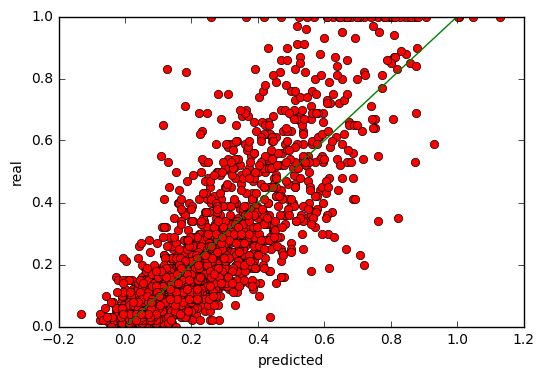

In [36]:
#Plot the correlation between predicted and actual values of the target attribute.
pl.plot(p,y,'ro')
pl.plot([0,1],[0,1],'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [37]:
#Display the weights
print ('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [  1.58394687e-01  -3.02481869e-02   2.12229063e-01  -3.97237986e-02
  -1.27930326e-02   6.36900639e-02   1.22194419e-01  -2.23124229e-01
  -1.42627637e-01   5.64658800e-02  -2.60230134e-01   4.65037847e-02
  -2.00798143e-01  -2.08126761e-01   4.70792802e-02  -1.73534979e-01
   5.82291674e-02   1.05064444e-02  -9.22106451e-02   2.72565616e-01
   9.72713359e-02  -3.26302914e-01  -2.89431388e-02  -3.59461641e-02
   2.28885702e-02   4.31169895e-02   3.76737976e-02   1.19950473e-01
  -1.83693623e-01  -9.47657739e-02   5.55240764e-02   1.07281673e-01
   3.24692051e-03   2.34646790e-01  -3.87649999e-02  -1.03179240e-02
   4.87331629e-01   2.23501778e-01   1.95680279e-01  -6.09603366e-01
  -1.37531328e-01   5.78881584e-02  -3.48705517e-01  -3.63011027e-02
   3.18567061e-04   5.73144283e-02  -1.83223819e-01  -1.56736510e-01
   1.30876568e-01  -1.42989741e-01   2.41003168e-02   3.51231959e-02
  -7.51880947e-02   3.13067150e-02  -3.09769559e-02  -2.23123389e-01
   4.44

In [38]:
#10fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    p=linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [39]:
method = 'Simple Linear Regression'
print ('Method: %s' %method)
print('RMSE on training: %.4f' %rmse_train)
print ('RMSE on 10 fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1287
RMSE on 10 fold CV: 0.1363


In [40]:
#####################
#Question 1c
#####################
'''Feature Selection: Perform linear regression with a subset of features. 
Write a script/function that takes as input the training data, target attribute; the model; and any other parameters, 
and returns optimal percentage of the most informative features to use.
You can use feature_selection.SelectPercentile to find the most informative variables.
Your approach should use k-fold cross-validation on the training data (you can use k=5). 
Show the list of most informative variables and their weights 
Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features 
(See scikit-learn's metrics.mean_absolute_error). 
In order to use cross_validation.cross_val_score with regression you'll need to pass to it:
scoring='mean_absolute_error' as a parameter. 
[Hint: for an example of a similar feature selection process please review the class example notebook. 
Also, review scikit-learn documentation for feature selection.]'''

"Feature Selection: Perform linear regression with a subset of features. \nWrite a script/function that takes as input the training data, target attribute; the model; and any other parameters, \nand returns optimal percentage of the most informative features to use.\nYou can use feature_selection.SelectPercentile to find the most informative variables.\nYour approach should use k-fold cross-validation on the training data (you can use k=5). \nShow the list of most informative variables and their weights \nNext, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features \n(See scikit-learn's metrics.mean_absolute_error). \nIn order to use cross_validation.cross_val_score with regression you'll need to pass to it:\nscoring='mean_absolute_error' as a parameter. \n[Hint: for an example of a similar feature selection process please review the class example notebook. \nAlso, review scikit-learn documentation for feature selection.]"

In [41]:
xpd = comm_.iloc[:,0:97]
x2 = comm_records
linreg = LinearRegression()

In [42]:
def optPercent(training):
    percentiles = range(1, 100, 5)
    results = []
    fSubset = []
    for i in range(1, 100, 5):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        x_train_fs = fs.fit_transform(x2, y)
        scores = cross_validation.cross_val_score(linreg, x_train_fs, y, cv=5, scoring='mean_absolute_error')
        results = np.append(results, scores.mean())

    optimal_percentil = np.where(results == results.max())[0]
    print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentil]), "\n")
    optimal_num_features = int(math.floor(percentiles[optimal_percentil]*len(xpd.columns)/100))
    print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

    # Plot percentile of features VS. cross-validation scores
    pl.figure()
    pl.xlabel("Percentage of features selected")
    pl.ylabel("Cross validation accuracy")
    pl.plot(percentiles,results)

    fsopt = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = percentiles[optimal_percentil])
    x_train_fsopt = fsopt.fit_transform(x2, y)
    for i in range(len(training.columns.values)):
        if fsopt.get_support()[i]:
            #print (training.columns.values[i], '\t', round(fsopt.scores_[i],2))
            print (training.columns.values[i], '\t', round(fsopt.scores_[i],2))
            fSubset.append(i)
    return fSubset

Optimal percentile of features:36 

Optimal number of features:34 

population 	 310.22
racepctblack 	 1330.48
racePctWhite 	 1766.24
numbUrban 	 302.0
medIncome 	 437.44
pctWInvInc 	 991.11
pctWPubAsst 	 985.09
medFamInc 	 476.15
perCapInc 	 281.89
NumUnderPov 	 498.77
PctPopUnderPov 	 748.35
PctLess9thGrade 	 405.22
PctNotHSGrad 	 607.29
PctUnemployed 	 681.73
MalePctDivorce 	 759.66
FemalePctDiv 	 891.48
TotalPctDiv 	 876.59
PctFam2Par 	 1994.74
PctKids2Par 	 2398.93
PctYoungKids2Par 	 1596.53
PctTeen2Par 	 1555.9
NumIlleg 	 567.69
PctIlleg 	 2399.44
PctLargHouseFam 	 343.27
PctPersOwnOccup 	 759.58
PctPersDenseHous 	 513.78
PctHousLess3BR 	 578.5
MedNumBR 	 291.6
HousVacant 	 429.89
PctHousOwnOcc 	 566.62
PctVacantBoarded 	 605.32
PctHousNoPhone 	 623.65
PctWOFullPlumb 	 305.41
NumInShelters 	 327.33
NumStreet 	 260.72


C:\Users\rebec\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
C:\Users\rebec\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
C:\Users\rebec\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


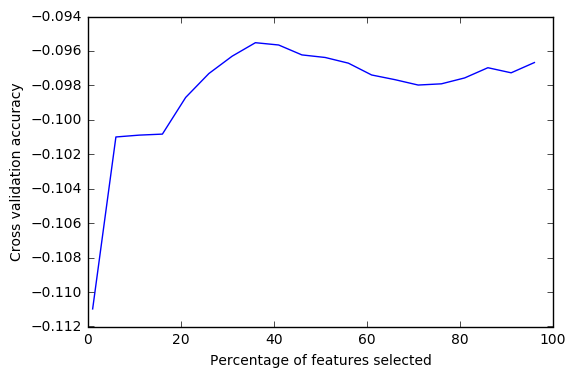

In [43]:
fsub = optPercent(xpd)

In [44]:
#Perform Linear Regression with new subset of features

In [45]:
#create new X with only subset features
newx = np.array([np.concatenate((v,[1])) for v in ((pd.DataFrame(x)[fsub]).as_matrix())])
newx.shape

(1993, 36)

In [46]:
linreg.fit(newx,y)
p = linreg.predict(newx)
err = abs(p-y)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print (err[:10])
print (rmse_train)

[ 0.01511131  0.35327475  0.04665008  0.27326871  0.01570285  0.06374773
  0.02271172  0.11494215  0.28383273  0.03661088]
0.134771431207


In [ ]:
#################
#Part d
#################
'''Perform Ridge Regression and Lasso Regression using sklearn.linear_model. 
For each, perform systematic model selection to identify optimal alpha. 
First, create a 20%-80% randomized split of the data.
You should create a function that takes as input the data and target attribute; 
the parameter to vary and a list of its values; the model to be trained; 
and any other relevant input needed to determine the optimal value for the 
specified parameter. The model selection process should perform k-fold 
cross validation (k should be a parameter, but you can select k=5 for 
this problem). You should also plot the error values on the training and 
cross-validation splits across the specified values of the alpha parameter. 
Finally, using the best alpha value, run the model on the set-aside test data. 
Discuss your observation and conclusions. 
[Hint: for an example of a similar model selection process please review the 
class example notebook.]'''

In [47]:
#uses comm_records&targets, length of 97
from sklearn import feature_selection
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(comm_records, comm_target, test_size=0.2, random_state=35)

np.set_printoptions(precision=4, linewidth=80, suppress=True)
print (x_test.shape)
print (x_train.shape)
print (y_test.shape)
print (y_train.shape)

(399, 97)
(1594, 97)
(399,)
(1594,)


In [ ]:
#Functions

In [168]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [124]:
def regularizedReg(records, target, alphaValues, model, k):
    print('alpha\t RMSE_train\t RMSE_10cv\n')
    t_rmse = np.array([])
    cv_rmse = np.array([])
    rmseInit = 1
    cvInit = 1

    for a in alphaValues:
        m = model(fit_intercept=True, alpha=a)
        # computing the RMSE on training data
        m.fit(records,target)
        p = m.predict(records)
        err = p-target
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))
        if rmse_train < rmseInit:
            rmseInit = rmse_train
            tmin = a
            
        # computing RMSE using 10-fold cross validation
        kf = KFold(len(records), n_folds=10)
        xval_err = 0
        for train, test in kf:
            m.fit(records[train], target[train])
            p = m.predict(records[test])
            err = p - target[test]
            xval_err += np.dot(err,err)
        rmse_10cv = np.sqrt(xval_err/len(records))
        if rmse_10cv < cvInit:
            cvInit = rmse_10cv
            cvmin = a

        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_10cv])
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))
    print('Lowest RMSE_train Alpha: {}'.format(tmin))
    print('Lowest RMSE_10cv Alpha: {}'.format(cvmin))
        
    #plot
    print('\n \n RMSE-Train and Xval Over Range of Alphas')
    pl.plot(alphaValues, t_rmse, label='RMSE-Train')
    pl.plot(alphaValues, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()
    return tmin, cvmin

In [ ]:
#Necessary variable creation

In [113]:
alphalst = np.linspace(.005,5,15)
#alphalst = np.array([int(e) for e in alphalst])

In [114]:
alphalst

array([ 0.005 ,  0.3618,  0.7186,  1.0754,  1.4321,  1.7889,  2.1457,  2.5025,
        2.8593,  3.2161,  3.5729,  3.9296,  4.2864,  4.6432,  5.    ])

In [115]:
ridge = Ridge()
lasso = Lasso()

In [ ]:
#Run Functions

alpha  =  0.005
alpha  =  0.361785714286
alpha  =  0.718571428571
alpha  =  1.07535714286
alpha  =  1.43214285714
alpha  =  1.78892857143
alpha  =  2.14571428571
alpha  =  2.5025
alpha  =  2.85928571429
alpha  =  3.21607142857
alpha  =  3.57285714286
alpha  =  3.92964285714
alpha  =  4.28642857143
alpha  =  4.64321428571
alpha  =  5.0


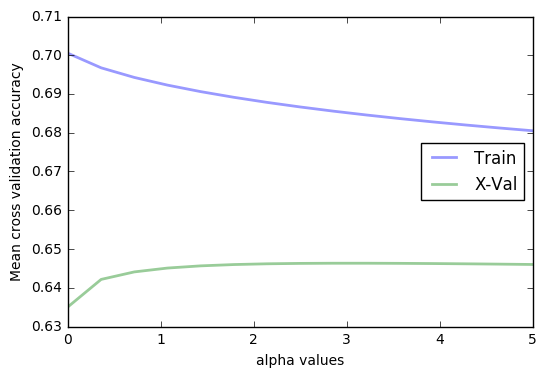

In [116]:
train_scores, test_scores = calc_params(x_train, y_train, ridge, alphalst, 'alpha', 5)

In [ ]:
#RIDGE REGRESSION

alpha	 RMSE_train	 RMSE_10cv

0.005	 0.1314		 0.1408
0.362	 0.1320		 0.1400
0.719	 0.1324		 0.1398
1.075	 0.1328		 0.1397
1.432	 0.1330		 0.1397
1.789	 0.1333		 0.1397
2.146	 0.1335		 0.1397
2.502	 0.1337		 0.1398
2.859	 0.1339		 0.1398
3.216	 0.1341		 0.1398
3.573	 0.1343		 0.1398
3.930	 0.1344		 0.1399
4.286	 0.1346		 0.1399
4.643	 0.1347		 0.1400
5.000	 0.1348		 0.1400
Lowest RMSE_train Alpha: 0.005
Lowest RMSE_10cv Alpha: 1.4321428571428572

 
 RMSE-Train and Xval Over Range of Alphas


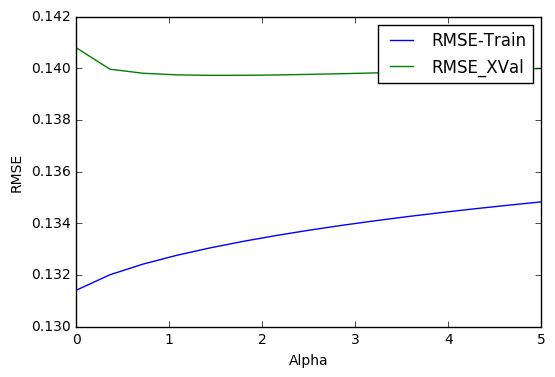

In [125]:
trainRidgeA, cvRidgeA = regularizedReg(x_train, y_train, alphalst, Ridge, 5)

alpha	 RMSE_train	 RMSE_10cv

0.005	 0.1478		 0.1491
0.362	 0.2379		 0.2383
0.719	 0.2379		 0.2383
1.075	 0.2379		 0.2383
1.432	 0.2379		 0.2383
1.789	 0.2379		 0.2383
2.146	 0.2379		 0.2383
2.502	 0.2379		 0.2383
2.859	 0.2379		 0.2383
3.216	 0.2379		 0.2383
3.573	 0.2379		 0.2383
3.930	 0.2379		 0.2383
4.286	 0.2379		 0.2383
4.643	 0.2379		 0.2383
5.000	 0.2379		 0.2383
Lowest RMSE_train Alpha: 0.005
Lowest RMSE_10cv Alpha: 0.005

 
 RMSE-Train and Xval Over Range of Alphas


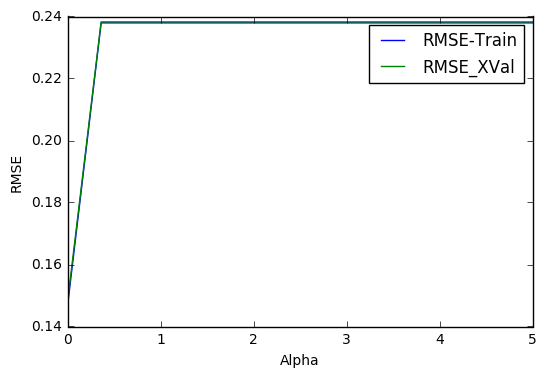

In [129]:
trainLassoA, cvLassoA = regularizedReg(x_train, y_train, alphalst, Lasso, 5)

In [ ]:
#Run with optimal alpha

In [132]:
ridge = Ridge(fit_intercept=True, alpha=trainRidgeA)
ridge.fit(x_test,y_test)
# Compute RMSE on training data
# p = np.array([ridge.predict(xi) for xi in x])
p = ridge.predict(x_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x_test), n_folds=10)
xval_err = 0
for train,test in kf:
    ridge.fit(x_test[train],y_test[train])
    p = ridge.predict(x_test[test])
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 0.1012
RMSE on 10-fold CV: 0.0606


In [133]:
ridge = Ridge(fit_intercept=True, alpha=cvRidgeA)
ridge.fit(x_test,y_test)
# Compute RMSE on training data
# p = np.array([ridge.predict(xi) for xi in x])
p = ridge.predict(x_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x_test), n_folds=10)
xval_err = 0
for train,test in kf:
    ridge.fit(x_test[train],y_test[train])
    p = ridge.predict(x_test[test])
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 0.1091
RMSE on 10-fold CV: 0.0566


In [135]:
lasso = Lasso(fit_intercept=True, alpha=trainRidgeA)
lasso.fit(x_test,y_test)
# Compute RMSE on training data
# p = np.array([ridge.predict(xi) for xi in x])
p = lasso.predict(x_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x_test), n_folds=10)
xval_err = 0
for train,test in kf:
    lasso.fit(x_test[train],y_test[train])
    p = lasso.predict(x_test[test])
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 0.1286
RMSE on 10-fold CV: 0.0588


In [134]:
lasso = Lasso(fit_intercept=True, alpha=cvRidgeA)
lasso.fit(x_test,y_test)
# Compute RMSE on training data
# p = np.array([ridge.predict(xi) for xi in x])
p = lasso.predict(x_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x_test), n_folds=10)
xval_err = 0
for train,test in kf:
    lasso.fit(x_test[train],y_test[train])
    p = lasso.predict(x_test[test])
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 0.2113
RMSE on 10-fold CV: 0.0946


In [ ]:
#################
#Part e
#################
'''Perform regression using Stochastic Gradient Descent for regression. 
Use the SGDRegessor module from sklearn.linear_model. 
Start with creating randomized 80%-20% train-test split. 
SGDRegessor requires that features be standardized (with 0 mean and scaled by sd). 
Perform the scaling using StandardScaler from sklearn.preprocessing. 
For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) 
Your grid search should compare combinations of two penalty parameters ('l2', 'l1') 
and different values of alpha (vary from 0.0001 to relatively large values). 
Using the best parameters, apply the model to the set-aside test data. 
Finally, perform model selection (similar to part d, above) to find the 
best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty 
parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, 
with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, 
l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, 
apply the Elastic Net model to the set-aside test data. Provide a summary of 
your findings from the above experiments'''

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(comm_records)
AllX_s = scaler.transform(comm_records)
scaler.fit(comm_target)
AllY_s = scaler.transform(comm_target)

C:\Users\rebec\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\rebec\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [165]:
#Split 80/20
from sklearn import feature_selection
from sklearn.cross_validation import train_test_split
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(AllX_s, AllY_s, test_size=0.2, random_state=35)

np.set_printoptions(precision=4, linewidth=80, suppress=True)
print (x_test_s.shape)
print (x_train_s.shape)
print (y_test_s.shape)
print (y_train_s.shape)

(399, 97)
(1594, 97)
(399,)
(1594,)


In [166]:
#Gridsearch
from sklearn.grid_search import GridSearchCV

sgdreg = SGDRegressor()

parameters = {
    'penalty':['l2','l1'],
    'alpha':np.linspace(.0001,1,25)
}

gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [167]:
%time _ = gs.fit(x_train_s, y_train_s)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.5s


Wall time: 1.99 s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.9s finished


({'alpha': 0.083424999999999999, 'penalty': 'l2'}, 0.63970496786677222)

In [163]:
sgdreg = SGDRegressor(penalty='l2', alpha=0.083, n_iter=200)

# Compute RMSE on training data
sgdreg.fit(x_test_s,y_test_s)
p = sgdreg.predict(x_test_s)
err = p-y_test_s
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x_test_s), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(x_test_s[train])
    xtrain_s = scaler.transform(x_test_s[train])
    xtest_s = scaler.transform(x_test_s[test])
    sgdreg.fit(xtrain_s,y_test_s[train])
    p = sgdreg.predict(xtest_s)
    e = p-y_test_s[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.4658
RMSE on 10-fold CV: 0.2463


In [ ]:
#elastic net

In [169]:
md = np.linspace(0,1,20)

l1_ratio  =  0.0
l1_ratio  =  0.0526315789474
l1_ratio  =  0.105263157895
l1_ratio  =  0.157894736842
l1_ratio  =  0.210526315789
l1_ratio  =  0.263157894737
l1_ratio  =  0.315789473684
l1_ratio  =  0.368421052632
l1_ratio  =  0.421052631579
l1_ratio  =  0.473684210526
l1_ratio  =  0.526315789474
l1_ratio  =  0.578947368421
l1_ratio  =  0.631578947368
l1_ratio  =  0.684210526316
l1_ratio  =  0.736842105263
l1_ratio  =  0.789473684211
l1_ratio  =  0.842105263158
l1_ratio  =  0.894736842105
l1_ratio  =  0.947368421053
l1_ratio  =  1.0


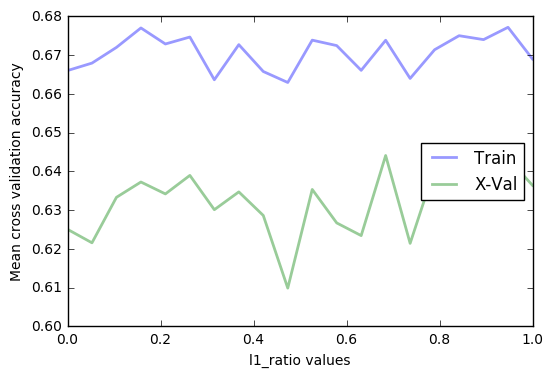

In [170]:
train_scores, test_scores = calc_params(x_train_s, y_train_s, sgdreg, md, 'l1_ratio', 5)

In [172]:
sgdreg = SGDRegressor(penalty='elasticnet', l1_ratio=.5789, alpha=0.083, n_iter=200)

# Compute RMSE on training data
sgdreg.fit(x_test_s,y_test_s)
p = sgdreg.predict(x_test_s)
err = p-y_test_s
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x_test_s), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(x_test_s[train])
    xtrain_s = scaler.transform(x_test_s[train])
    xtest_s = scaler.transform(x_test_s[test])
    sgdreg.fit(xtrain_s,y_test_s[train])
    p = sgdreg.predict(xtest_s)
    e = p-y_test_s[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.5120
RMSE on 10-fold CV: 0.2400
